# Gaussian Data Analysis

This notebook is analyzing the Gaussian simulation study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
load_path = r"G:\My Drive\Studium\UNIGE_Master\Thesis\Master_Thesis\Data\Gaussian_Data_processed\Gauss_Processed_data.pkl"

#loading the data
# df = pd.read_csv(load_path) # takes way longer and loads from csv source
df = pd.read_pickle(load_path)

df = df.drop(["time", "MMD"], axis=1)

In [3]:
df.shape[0] # the expected number of rows is 27000*1500 = 40500000, the simulation worked now


40500000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40500000 entries, 0 to 224999
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   mu_hat         float64
 1   sigma_hat      float64
 2   mu_hat_MLE     float64
 3   sigma_hat_MLE  float64
 4   mu             int32  
 5   sigma          int32  
 6   xsize          int32  
 7   ysize          int32  
 8   b              object 
 9   ID             int32  
dtypes: float64(4), int32(5), object(1)
memory usage: 2.6+ GB


# Notes

* For big sigma convergence is might not be achieved in 1500 iterations for all b. When b is selected intelligently or sigma small no issue.
* b is important
* bigger sigma needs more iteration => clear but important result
* sample size doesn't seem to be very important

# Full Aggregation

In [5]:
def last_150_rows(group):
    return group.tail(150)

full_group_by = ["mu", "sigma", "b", "xsize", "ysize", "ID"]

df_last_150 = df.groupby(full_group_by).apply(last_150_rows).reset_index(drop=True)

df_last_150

C:\Users\nickk\AppData\Local\Temp\ipykernel_3732\2439513004.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_last_150 = df.groupby(full_group_by).apply(last_150_rows).reset_index(drop=True)


,mu_hat,sigma_hat,mu_hat_MLE,sigma_hat_MLE,mu,sigma,xsize,ysize,b,ID
0,-2.663525,1.779942,-2.735997,1.819368,-3,2,50,50,b0.01,1
1,-2.658452,1.790461,-2.735997,1.819368,-3,2,50,50,b0.01,1
2,-2.658108,1.810872,-2.735997,1.819368,-3,2,50,50,b0.01,1
3,-2.658157,1.834405,-2.735997,1.819368,-3,2,50,50,b0.01,1
4,-2.657728,1.865246,-2.735997,1.819368,-3,2,50,50,b0.01,1
...,...,...,...,...,...,...,...,...,...,...
4049995,48.140717,38.164795,47.928772,38.732870,50,40,1000,1000,bAUTO,150
4049996,48.138710,38.165480,47.928772,38.732870,50,40,1000,1000,bAUTO,150
4049997,48.137050,38.166780,47.928772,38.732870,50,40,1000,1000,bAUTO,150
4049998,48.136300,38.168580,47.928772,38.732870,50,40,1000,1000,bAUTO,150


In [6]:
df_last_150_aggregated = df_last_150.groupby(full_group_by).agg(["count", 'mean', "std"])
df_last_150_aggregated

mu_hat                      sigma_hat  \
                                 count       mean       std     count   
mu  sigma b     xsize ysize ID                                          
-3  2     b0.01 50    50    1      150  -2.727881  0.076614       150   
                            2      150  -3.111784  0.129122       150   
                            3      150  -2.720032  0.095749       150   
                            4      150  -3.297921  0.101446       150   
                            5      150  -3.038660  0.090056       150   
...                                ...        ...       ...       ...   
 50 40    bAUTO 1000  1000  146    150  49.411338  0.080134       150   
                            147    150  48.987569  0.102744       150   
                            148    150  49.123753  0.119800       150   
                            149    150  50.128883  0.092990       150   
                            150    150  48.058277  0.060726       150   

                                                     mu_hat_MLE             \
                                      mean       std      count       mean   
mu  sigma b     xsize ysize ID                                               
-3  2     b0.01 50    50    1     1.836742  0.138445        150  -2.735997   
                            2     1.980446  0.107567        150  -3.078314   
                            3     1.901777  0.105188        150  -2.748321   
                            4     1.537737  0.107025        150  -3.281941   
                            5     1.959953  0.185349        150  -3.001362   
...                                    ...       ...        ...        ...   
 50 40    bAUTO 1000  1000  146  39.592582  0.029520        150  49.943375   
                            147  40.191647  0.048134        150  49.343200   
                            148  41.582529  0.014275        150  49.477093   
                            149  39.123978  0.024637        150  49.844140   
                            150  38.219685  0.036714        150  47.928772   

                                     sigma_hat_MLE                  
                                 std         count       mean  std  
mu  sigma b     xsize ysize ID                                      
-3  2     b0.01 50    50    1    0.0           150   1.819368  0.0  
                            2    0.0           150   1.948005  0.0  
                            3    0.0           150   1.881310  0.0  
                            4    0.0           150   1.577719  0.0  
                            5    0.0           150   1.997410  0.0  
...                              ...           ...        ...  ...  
 50 40    bAUTO 1000  1000  146  0.0           150  39.196507  0.0  
                            147  0.0           150  40.433594  0.0  
                            148  0.0           150  41.056114  0.0  
                            149  0.0           150  40.019485  0.0  
                            150  0.0           150  38.732870  0.0  

[27000 rows x 12 columns]

# Tables aggregated over the 150 simulations split by b values

In [7]:
df_last_150_aggregated_mean_ID = df_last_150_aggregated.groupby(["mu", "sigma", "b", "xsize", "ysize"]).mean()
df_last_150_aggregated_mean_ID

mu_hat                      sigma_hat             \
                             count       mean       std     count       mean   
mu  sigma b     xsize ysize                                                    
-3  2     b0.01 50    50     150.0  -2.968290  0.101849     150.0   1.995193   
                100   50     150.0  -2.978076  0.081296     150.0   1.961372   
                      100    150.0  -2.942386  0.083044     150.0   2.008549   
                200   50     150.0  -2.988540  0.063484     150.0   1.978943   
                      100    150.0  -3.013903  0.063252     150.0   1.989079   
...                            ...        ...       ...       ...        ...   
 50 40    bAUTO 1000  50     150.0  49.971696  0.116858     150.0  39.614272   
                      100    150.0  49.485513  0.098277     150.0  39.678048   
                      200    150.0  49.236165  0.097546     150.0  39.877848   
                      500    150.0  49.308066  0.096301     150.0  40.050973   
                      1000   150.0  49.479948  0.095506     150.0  40.070691   

                                      mu_hat_MLE                  \
                                  std      count       mean  std   
mu  sigma b     xsize ysize                                        
-3  2     b0.01 50    50     0.114826      150.0  -2.972657  0.0   
                100   50     0.082112      150.0  -2.978036  0.0   
                      100    0.084407      150.0  -2.940310  0.0   
                200   50     0.060902      150.0  -2.987249  0.0   
                      100    0.059953      150.0  -3.013172  0.0   
...                               ...        ...        ...  ...   
 50 40    bAUTO 1000  50     0.045514      150.0  50.499486  0.0   
                      100    0.039361      150.0  49.944500  0.0   
                      200    0.035782      150.0  49.869723  0.0   
                      500    0.031841      150.0  49.717181  0.0   
                      1000   0.034139      150.0  49.871051  0.0   

                            sigma_hat_MLE                  
                                    count       mean  std  
mu  sigma b     xsize ysize                                
-3  2     b0.01 50    50            150.0   1.990064  0.0  
                100   50            150.0   1.957276  0.0  
                      100           150.0   2.009863  0.0  
                200   50            150.0   1.977094  0.0  
                      100           150.0   1.988015  0.0  
...                                   ...        ...  ...  
 50 40    bAUTO 1000  50            150.0  39.705934  0.0  
                      100           150.0  39.643897  0.0  
                      200           150.0  39.706229  0.0  
                      500           150.0  39.981556  0.0  
                      1000          150.0  39.956179  0.0  

[180 rows x 12 columns]

In [8]:
df_last_150_aggregated_mean_ID = df_last_150_aggregated_mean_ID.reset_index()


In [9]:
df_last_150_aggregated_mean_ID[df_last_150_aggregated_mean_ID["b",]=="b0.1"].groupby(["mu", "sigma", "b", "xsize", "ysize"]).mean()

C:\Users\nickk\AppData\Local\Temp\ipykernel_3732\3927573234.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_last_150_aggregated_mean_ID[df_last_150_aggregated_mean_ID["b",]=="b0.1"].groupby(["mu", "sigma", "b", "xsize", "ysize"]).mean()
C:\Users\nickk\AppData\Local\Temp\ipykernel_3732\3927573234.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_last_150_aggregated_mean_ID[df_last_150_aggregated_mean_ID["b",]=="b0.1"].groupby(["mu", "sigma", "b", "xsize", "ysize"]).mean()


mu_hat                      sigma_hat             \
                            count       mean       std     count       mean   
mu  sigma b    xsize ysize                                                    
-3  2     b0.1 50    50     150.0  -3.011434  0.108715     150.0   1.983650   
               100   50     150.0  -2.995141  0.088390     150.0   1.966819   
                     100    150.0  -2.973299  0.087676     150.0   1.988241   
               200   50     150.0  -2.979864  0.070121     150.0   1.992504   
                     100    150.0  -3.004042  0.068772     150.0   2.005897   
                     200    150.0  -2.984350  0.068554     150.0   1.985895   
               500   50     150.0  -3.011674  0.048373     150.0   1.978949   
                     100    150.0  -3.013002  0.048403     150.0   1.981386   
                     200    150.0  -2.996331  0.048737     150.0   2.001765   
                     500    150.0  -3.004843  0.048220     150.0   1.993654   
               1000  50     150.0  -3.005961  0.035771     150.0   2.008578   
                     100    150.0  -3.031605  0.034971     150.0   1.980407   
                     200    150.0  -2.990605  0.035050     150.0   2.003415   
                     500    150.0  -2.989090  0.035629     150.0   1.987001   
                     1000   150.0  -3.000790  0.036255     150.0   2.005280   
    40    b0.1 50    50     150.0  -1.908851  0.385889     150.0  23.587296   
               100   50     150.0  -3.521297  0.349656     150.0  23.642223   
                     100    150.0  -2.261245  0.352913     150.0  24.077955   
               200   50     150.0  -3.234184  0.349275     150.0  23.741339   
                     100    150.0  -3.387191  0.327605     150.0  24.101471   
                     200    150.0  -2.763320  0.326285     150.0  24.330019   
               500   50     150.0  -2.479740  0.308786     150.0  23.740288   
                     100    150.0  -2.508659  0.287754     150.0  24.200909   
                     200    150.0  -2.780886  0.278674     150.0  24.355386   
                     500    150.0  -2.926202  0.247827     150.0  24.452394   
               1000  50     150.0  -2.995948  0.272576     150.0  23.670777   
                     100    150.0  -2.978409  0.260298     150.0  24.107979   
                     200    150.0  -3.788975  0.214831     150.0  24.393699   
                     500    150.0  -3.253339  0.185396     150.0  24.513874   
                     1000   150.0  -3.047473  0.183627     150.0  24.552326   
 50 2     b0.1 50    50     150.0  49.980893  0.128327     150.0   1.974589   
               100   50     150.0  50.000760  0.102727     150.0   1.986930   
                     100    150.0  50.003781  0.106415     150.0   1.997073   
               200   50     150.0  50.007569  0.084284     150.0   1.978556   
                     100    150.0  49.997806  0.085625     150.0   1.968284   
                     200    150.0  49.996486  0.085578     150.0   1.996199   
               500   50     150.0  50.034181  0.065813     150.0   1.966358   
                     100    150.0  50.008621  0.064375     150.0   1.976254   
                     200    150.0  50.016338  0.065337     150.0   1.988458   
                     500    150.0  50.005306  0.064979     150.0   1.994980   
               1000  50     150.0  49.978126  0.053481     150.0   1.981400   
                     100    150.0  50.011986  0.053227     150.0   1.988509   
                     200    150.0  49.988358  0.052826     150.0   1.992058   
                     500    150.0  49.992920  0.052342     150.0   1.992928   
                     1000   150.0  50.003155  0.052522     150.0   2.000556   
    40    b0.1 50    50     150.0  40.729339  0.674810     150.0  24.499678   
               100   50     150.0  44.081574  0.717309     150.0  24.574566   
                     100    150.0  45.904775  0.490042     150.0  24.511765  

In [10]:
df_last_150_aggregated_mean_ID[df_last_150_aggregated_mean_ID["b",]=="b0.01"].groupby(["mu", "sigma", "b", "xsize", "ysize"]).mean()

C:\Users\nickk\AppData\Local\Temp\ipykernel_3732\3647435537.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_last_150_aggregated_mean_ID[df_last_150_aggregated_mean_ID["b",]=="b0.01"].groupby(["mu", "sigma", "b", "xsize", "ysize"]).mean()
C:\Users\nickk\AppData\Local\Temp\ipykernel_3732\3647435537.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_last_150_aggregated_mean_ID[df_last_150_aggregated_mean_ID["b",]=="b0.01"].groupby(["mu", "sigma", "b", "xsize", "ysize"]).mean()


mu_hat                      sigma_hat             \
                             count       mean       std     count       mean   
mu  sigma b     xsize ysize                                                    
-3  2     b0.01 50    50     150.0  -2.968290  0.101849     150.0   1.995193   
                100   50     150.0  -2.978076  0.081296     150.0   1.961372   
                      100    150.0  -2.942386  0.083044     150.0   2.008549   
                200   50     150.0  -2.988540  0.063484     150.0   1.978943   
                      100    150.0  -3.013903  0.063252     150.0   1.989079   
                      200    150.0  -3.000539  0.062903     150.0   1.985974   
                500   50     150.0  -2.998938  0.042527     150.0   1.979954   
                      100    150.0  -3.014794  0.042921     150.0   1.972539   
                      200    150.0  -3.006375  0.043466     150.0   1.996221   
                      500    150.0  -3.007685  0.044057     150.0   2.003064   
                1000  50     150.0  -2.999069  0.031602     150.0   1.953517   
                      100    150.0  -3.009423  0.031758     150.0   1.989967   
                      200    150.0  -2.996406  0.031516     150.0   1.981121   
                      500    150.0  -3.003681  0.031308     150.0   1.993475   
                      1000   150.0  -2.997339  0.033661     150.0   2.002568   
    40    b0.01 50    50     150.0  -3.829401  0.342074     150.0  33.294267   
                100   50     150.0  -1.796569  0.288944     150.0  33.626888   
                      100    150.0  -2.645375  0.308752     150.0  34.413313   
                200   50     150.0  -2.719237  0.234591     150.0  33.595215   
                      100    150.0  -3.067194  0.243168     150.0  34.334996   
                      200    150.0  -3.096707  0.254485     150.0  34.596128   
                500   50     150.0  -3.789199  0.203547     150.0  33.885223   
                      100    150.0  -3.459446  0.190627     150.0  34.320923   
                      200    150.0  -2.879464  0.202200     150.0  34.448270   
                      500    150.0  -2.568157  0.206294     150.0  34.613991   
                1000  50     150.0  -4.090165  0.169375     150.0  33.763656   
                      100    150.0  -2.814881  0.162953     150.0  34.391000   
                      200    150.0  -2.394339  0.156891     150.0  34.551295   
                      500    150.0  -2.672227  0.151007     150.0  34.539286   
                      1000   150.0  -2.937368  0.177795     150.0  34.719538   
 50 2     b0.01 50    50     150.0  50.013016  0.101130     150.0   1.969094   
                100   50     150.0  49.967498  0.084554     150.0   1.999805   
                      100    150.0  50.025134  0.080329     150.0   1.971105   
                200   50     150.0  50.003973  0.063494     150.0   1.961236   
                      100    150.0  49.985806  0.064119     150.0   2.001285   
                      200    150.0  50.010163  0.063017     150.0   2.000577   
                500   50     150.0  50.009005  0.043176     150.0   1.928859   
                      100    150.0  49.987221  0.043588     150.0   1.975874   
                      200    150.0  49.989965  0.043678     150.0   1.990486   
                      500    150.0  49.998541  0.042699     150.0   1.991306   
                1000  50     150.0  49.978239  0.031647     150.0   2.015452   
                      100    150.0  50.020777  0.031940     150.0   1.982030   
                      200    150.0  50.011932  0.031742     150.0   1.988430   
                      500    150.0  49.998022  0.031860     150.0   1.994217   
                      1000   150.0  50.000079  0.032089     150.0   2.001824   
    40    b0.01 50    50     150.0  50.001214  0.274288     150.0  33.769702   
                100   50     150.0  50.061341  0.222531     150.0  33.514809   
                      100   

In [11]:
df_last_150_aggregated_mean_ID[df_last_150_aggregated_mean_ID["b",]=="bAUTO"].groupby(["mu", "sigma", "b", "xsize", "ysize"]).mean()

C:\Users\nickk\AppData\Local\Temp\ipykernel_3732\2809225662.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_last_150_aggregated_mean_ID[df_last_150_aggregated_mean_ID["b",]=="bAUTO"].groupby(["mu", "sigma", "b", "xsize", "ysize"]).mean()
C:\Users\nickk\AppData\Local\Temp\ipykernel_3732\2809225662.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_last_150_aggregated_mean_ID[df_last_150_aggregated_mean_ID["b",]=="bAUTO"].groupby(["mu", "sigma", "b", "xsize", "ysize"]).mean()


mu_hat                      sigma_hat             \
                             count       mean       std     count       mean   
mu  sigma b     xsize ysize                                                    
-3  2     bAUTO 50    50     150.0  -3.030668  0.111487     150.0   2.011482   
                100   50     150.0  -3.001620  0.091307     150.0   1.982875   
                      100    150.0  -2.978412  0.092319     150.0   2.001877   
                200   50     150.0  -2.945056  0.070734     150.0   1.961358   
                      100    150.0  -2.997318  0.073143     150.0   2.000278   
                      200    150.0  -3.013055  0.069699     150.0   1.997898   
                500   50     150.0  -2.968790  0.049069     150.0   1.992606   
                      100    150.0  -3.006305  0.049249     150.0   1.983615   
                      200    150.0  -3.018242  0.047540     150.0   2.006014   
                      500    150.0  -2.988054  0.050705     150.0   1.994291   
                1000  50     150.0  -2.993706  0.036576     150.0   1.979602   
                      100    150.0  -2.994347  0.036753     150.0   1.977879   
                      200    150.0  -3.012840  0.038207     150.0   2.004642   
                      500    150.0  -2.988152  0.036430     150.0   1.995804   
                      1000   150.0  -2.990802  0.036336     150.0   2.000571   
    40    bAUTO 50    50     150.0  -3.625732  0.339363     150.0  39.118200   
                100   50     150.0  -3.046283  0.293799     150.0  39.468154   
                      100    150.0  -3.235694  0.308345     150.0  38.999086   
                200   50     150.0  -2.728984  0.260047     150.0  39.719785   
                      100    150.0  -3.693536  0.276747     150.0  39.355245   
                      200    150.0  -3.115460  0.289805     150.0  40.063591   
                500   50     150.0  -3.472893  0.205460     150.0  39.389820   
                      100    150.0  -3.192216  0.226414     150.0  39.572521   
                      200    150.0  -3.001612  0.241079     150.0  39.891502   
                      500    150.0  -3.182081  0.259141     150.0  39.912246   
                1000  50     150.0  -2.105030  0.169188     150.0  38.938404   
                      100    150.0  -3.087578  0.185780     150.0  39.721352   
                      200    150.0  -2.727785  0.201605     150.0  39.680628   
                      500    150.0  -2.947134  0.209529     150.0  39.649149   
                      1000   150.0  -2.820309  0.237630     150.0  39.829801   
 50 2     bAUTO 50    50     150.0  50.002412  0.119495     150.0   1.919408   
                100   50     150.0  49.993370  0.097050     150.0   1.958598   
                      100    150.0  50.010899  0.099699     150.0   1.996226   
                200   50     150.0  50.026917  0.080246     150.0   1.980456   
                      100    150.0  50.020528  0.078149     150.0   1.967786   
                      200    150.0  50.001041  0.079648     150.0   1.988081   
                500   50     150.0  50.009475  0.055449     150.0   1.956930   
                      100    150.0  49.964050  0.054543     150.0   1.968224   
                      200    150.0  50.011928  0.056683     150.0   1.992978   
                      500    150.0  50.008752  0.055006     150.0   1.998599   
                1000  50     150.0  50.017095  0.041449     150.0   1.954514   
                      100    150.0  49.973318  0.042304     150.0   1.973536   
                      200    150.0  50.015881  0.040960     150.0   1.978685   
                      500    150.0  50.009174  0.041601     150.0   1.996234   
                      1000   150.0  50.006750  0.041913     150.0   1.993882   
    40    bAUTO 50    50     150.0  49.732441  0.167191     150.0  38.091472   
                100   50     150.0  50.216037  0.155418     150.0  39.642209   
                      100   

# Dist Plot for estimators

In [12]:
df_last_150_aggregated

mu_hat                      sigma_hat  \
                                 count       mean       std     count   
mu  sigma b     xsize ysize ID                                          
-3  2     b0.01 50    50    1      150  -2.727881  0.076614       150   
                            2      150  -3.111784  0.129122       150   
                            3      150  -2.720032  0.095749       150   
                            4      150  -3.297921  0.101446       150   
                            5      150  -3.038660  0.090056       150   
...                                ...        ...       ...       ...   
 50 40    bAUTO 1000  1000  146    150  49.411338  0.080134       150   
                            147    150  48.987569  0.102744       150   
                            148    150  49.123753  0.119800       150   
                            149    150  50.128883  0.092990       150   
                            150    150  48.058277  0.060726       150   

                                                     mu_hat_MLE             \
                                      mean       std      count       mean   
mu  sigma b     xsize ysize ID                                               
-3  2     b0.01 50    50    1     1.836742  0.138445        150  -2.735997   
                            2     1.980446  0.107567        150  -3.078314   
                            3     1.901777  0.105188        150  -2.748321   
                            4     1.537737  0.107025        150  -3.281941   
                            5     1.959953  0.185349        150  -3.001362   
...                                    ...       ...        ...        ...   
 50 40    bAUTO 1000  1000  146  39.592582  0.029520        150  49.943375   
                            147  40.191647  0.048134        150  49.343200   
                            148  41.582529  0.014275        150  49.477093   
                            149  39.123978  0.024637        150  49.844140   
                            150  38.219685  0.036714        150  47.928772   

                                     sigma_hat_MLE                  
                                 std         count       mean  std  
mu  sigma b     xsize ysize ID                                      
-3  2     b0.01 50    50    1    0.0           150   1.819368  0.0  
                            2    0.0           150   1.948005  0.0  
                            3    0.0           150   1.881310  0.0  
                            4    0.0           150   1.577719  0.0  
                            5    0.0           150   1.997410  0.0  
...                              ...           ...        ...  ...  
 50 40    bAUTO 1000  1000  146  0.0           150  39.196507  0.0  
                            147  0.0           150  40.433594  0.0  
                            148  0.0           150  41.056114  0.0  
                            149  0.0           150  40.019485  0.0  
                            150  0.0           150  38.732870  0.0  

[27000 rows x 12 columns]

In [13]:
# getting the individual parameter combination sub dataframes 

df_last_150_aggregated_index_reset = df_last_150_aggregated.reset_index()


# Get the unique combinations of the multi-index levels

param_combinations = df_last_150_aggregated_index_reset.groupby(["mu", "sigma", "b", "xsize", "ysize"]).groups.keys()
param_combinations

# Iterate through each combination of index levels



dict_keys([(-3, 2, 'b0.01', 50, 50), (-3, 2, 'b0.01', 100, 50), (-3, 2, 'b0.01', 100, 100), (-3, 2, 'b0.01', 200, 50), (-3, 2, 'b0.01', 200, 100), (-3, 2, 'b0.01', 200, 200), (-3, 2, 'b0.01', 500, 50), (-3, 2, 'b0.01', 500, 100), (-3, 2, 'b0.01', 500, 200), (-3, 2, 'b0.01', 500, 500), (-3, 2, 'b0.01', 1000, 50), (-3, 2, 'b0.01', 1000, 100), (-3, 2, 'b0.01', 1000, 200), (-3, 2, 'b0.01', 1000, 500), (-3, 2, 'b0.01', 1000, 1000), (-3, 2, 'b0.1', 50, 50), (-3, 2, 'b0.1', 100, 50), (-3, 2, 'b0.1', 100, 100), (-3, 2, 'b0.1', 200, 50), (-3, 2, 'b0.1', 200, 100), (-3, 2, 'b0.1', 200, 200), (-3, 2, 'b0.1', 500, 50), (-3, 2, 'b0.1', 500, 100), (-3, 2, 'b0.1', 500, 200), (-3, 2, 'b0.1', 500, 500), (-3, 2, 'b0.1', 1000, 50), (-3, 2, 'b0.1', 1000, 100), (-3, 2, 'b0.1', 1000, 200), (-3, 2, 'b0.1', 1000, 500), (-3, 2, 'b0.1', 1000, 1000), (-3, 2, 'bAUTO', 50, 50), (-3, 2, 'bAUTO', 100, 50), (-3, 2, 'bAUTO', 100, 100), (-3, 2, 'bAUTO', 200, 50), (-3, 2, 'bAUTO', 200, 100), (-3, 2, 'bAUTO', 200, 200), 

In [14]:
# kde_chart_folder = r"G:\My Drive\Studium\UNIGE_Master\Thesis\Master_Thesis\Data\Gaussian_KDE_charts"

# counter = 0
# plt.rcParams['text.usetex'] = True




# # Iterate through each combination of index levels and create kde charts
# for mu, sigma, b, xsize, ysize in param_combinations:

# 	df_param_combination = df_last_150_aggregated_index_reset[(df_last_150_aggregated_index_reset["mu"]==mu) & (df_last_150_aggregated_index_reset["sigma"]==sigma) 
# 							   & (df_last_150_aggregated_index_reset["b"]==b) & (df_last_150_aggregated_index_reset["xsize"]==xsize) 
# 							   & (df_last_150_aggregated_index_reset["ysize"]==ysize)]
	
	

# 	sns.kdeplot(data=df_param_combination, x=("mu_hat","mean"), label=r'$\hat{\mu}$', fill=True)
# 	sns.kdeplot(data=df_param_combination, x=("sigma_hat","mean"), label=r'$\hat{\sigma}$', fill=True)
	
# 	plt.legend(title='Estimates', loc="upper center")
# 	plt.xlabel("Parameter Values")
# 	plt.axvline(df_param_combination["mu"].iloc[0], color = "blue")
# 	plt.axvline(df_param_combination["sigma"].iloc[0], color="orange")

# 	plt.title(f"Distribution plot with {b}, xsize {xsize} and ysize {ysize}")
# 	plt.savefig(f"{kde_chart_folder}\mu{mu}_sigma{sigma}_b{b}_xsize{xsize}_ysize{ysize}.png")
# 	#plt.show()


	

# 	plt.close()

# 	counter += 1
# 	print(f"created and saved {counter} figures")
	

# Convergence plots

In [69]:
df = df.reset_index(drop=True)
df

,mu_hat,sigma_hat,mu_hat_MLE,sigma_hat_MLE,mu,sigma,xsize,ysize,b,ID
0,-0.100000,1.100000,-3.003443,2.049971,-3,2,200,200,b0.01,1
1,-0.199801,1.187607,-3.003443,2.049971,-3,2,200,200,b0.01,1
2,-0.299535,1.273132,-3.003443,2.049971,-3,2,200,200,b0.01,1
3,-0.399158,1.347453,-3.003443,2.049971,-3,2,200,200,b0.01,1
4,-0.498147,1.429359,-3.003443,2.049971,-3,2,200,200,b0.01,1
...,...,...,...,...,...,...,...,...,...,...
40499995,-3.515824,25.350538,-4.401012,42.589523,-3,40,500,200,b0.1,150
40499996,-3.516444,25.358510,-4.401012,42.589523,-3,40,500,200,b0.1,150
40499997,-3.515507,25.366495,-4.401012,42.589523,-3,40,500,200,b0.1,150
40499998,-3.510663,25.374258,-4.401012,42.589523,-3,40,500,200,b0.1,150


In [70]:
df.columns

Index(['mu_hat', 'sigma_hat', 'mu_hat_MLE', 'sigma_hat_MLE', 'mu', 'sigma',
       'xsize', 'ysize', 'b', 'ID'],
      dtype='object')

In [71]:
number_iterations = 1500
df = pd.concat([df, pd.DataFrame.from_dict({"Iteration": np.tile(np.arange(number_iterations),int(df.shape[0]/number_iterations))})], axis=1)
df

,mu_hat,sigma_hat,mu_hat_MLE,sigma_hat_MLE,mu,sigma,xsize,ysize,b,ID,Iteration
0,-0.100000,1.100000,-3.003443,2.049971,-3,2,200,200,b0.01,1,0
1,-0.199801,1.187607,-3.003443,2.049971,-3,2,200,200,b0.01,1,1
2,-0.299535,1.273132,-3.003443,2.049971,-3,2,200,200,b0.01,1,2
3,-0.399158,1.347453,-3.003443,2.049971,-3,2,200,200,b0.01,1,3
4,-0.498147,1.429359,-3.003443,2.049971,-3,2,200,200,b0.01,1,4
...,...,...,...,...,...,...,...,...,...,...,...
40499995,-3.515824,25.350538,-4.401012,42.589523,-3,40,500,200,b0.1,150,1495
40499996,-3.516444,25.358510,-4.401012,42.589523,-3,40,500,200,b0.1,150,1496
40499997,-3.515507,25.366495,-4.401012,42.589523,-3,40,500,200,b0.1,150,1497
40499998,-3.510663,25.374258,-4.401012,42.589523,-3,40,500,200,b0.1,150,1498


In [72]:
param_combinations = df.groupby(["mu", "sigma", "b", "xsize", "ysize"]).groups.keys()
param_combinations

dict_keys([(-3, 2, 'b0.01', 50, 50), (-3, 2, 'b0.01', 100, 50), (-3, 2, 'b0.01', 100, 100), (-3, 2, 'b0.01', 200, 50), (-3, 2, 'b0.01', 200, 100), (-3, 2, 'b0.01', 200, 200), (-3, 2, 'b0.01', 500, 50), (-3, 2, 'b0.01', 500, 100), (-3, 2, 'b0.01', 500, 200), (-3, 2, 'b0.01', 500, 500), (-3, 2, 'b0.01', 1000, 50), (-3, 2, 'b0.01', 1000, 100), (-3, 2, 'b0.01', 1000, 200), (-3, 2, 'b0.01', 1000, 500), (-3, 2, 'b0.01', 1000, 1000), (-3, 2, 'b0.1', 50, 50), (-3, 2, 'b0.1', 100, 50), (-3, 2, 'b0.1', 100, 100), (-3, 2, 'b0.1', 200, 50), (-3, 2, 'b0.1', 200, 100), (-3, 2, 'b0.1', 200, 200), (-3, 2, 'b0.1', 500, 50), (-3, 2, 'b0.1', 500, 100), (-3, 2, 'b0.1', 500, 200), (-3, 2, 'b0.1', 500, 500), (-3, 2, 'b0.1', 1000, 50), (-3, 2, 'b0.1', 1000, 100), (-3, 2, 'b0.1', 1000, 200), (-3, 2, 'b0.1', 1000, 500), (-3, 2, 'b0.1', 1000, 1000), (-3, 2, 'bAUTO', 50, 50), (-3, 2, 'bAUTO', 100, 50), (-3, 2, 'bAUTO', 100, 100), (-3, 2, 'bAUTO', 200, 50), (-3, 2, 'bAUTO', 200, 100), (-3, 2, 'bAUTO', 200, 200), 

In [99]:
saving_path_convergence = r"G:\My Drive\Studium\UNIGE_Master\Thesis\Master_Thesis\Data\Gaussian_Convergence_charts"

In [101]:
# # go through the different simulation runs => 180
# counter = 0
# for mu, sigma, b, xsize, ysize in param_combinations:

# 	simulations_df = df[(df["mu"]==mu) & (df["sigma"]==sigma) 
# 		     & (df["b"]==b) & (df["xsize"]==xsize) & (df["ysize"]==ysize)]
	
# 	melted_df = simulations_df.melt(id_vars=["ID", "Iteration"],
# 		    value_vars=["mu_hat","sigma_hat"],
# 		    var_name = "param_type",
# 		    value_name = "param_value")
	
# 	sns.lineplot(data=melted_df, x='Iteration', y='param_value', hue='ID', style='param_type')
	
# 	plt.axhline(y=mu, color="blue")
# 	plt.axhline(y=sigma, color="orange")
# 	plt.ylabel("Paramter Value")

# 	plt.title(f"Convergence plot with mu {mu}, sigma {sigma}, {b}, xsize {xsize} and ysize {ysize}")

# 	file_name = f"mu{mu}_sigma{sigma}_b{b}_xsize{xsize}_ysize{ysize}.png"
# 	plt.savefig(f"{saving_path_convergence}\{file_name}")
# 	plt.close()

# 	counter += 1

# 	print(f"saved {counter} figures")

	

<string>:22: SyntaxWarning: invalid escape sequence '\{'
<>:22: SyntaxWarning: invalid escape sequence '\{'
<string>:22: SyntaxWarning: invalid escape sequence '\{'
<>:22: SyntaxWarning: invalid escape sequence '\{'
C:\Users\nickk\AppData\Local\Temp\ipykernel_22240\4047751457.py:22: SyntaxWarning: invalid escape sequence '\{'
  plt.savefig(f"{saving_path_convergence}\{file_name}")


saved 1 figures
saved 2 figures
saved 3 figures
saved 4 figures
saved 5 figures
saved 6 figures
saved 7 figures
saved 8 figures
saved 9 figures
saved 10 figures
saved 11 figures
saved 12 figures
saved 13 figures
saved 14 figures
saved 15 figures
saved 16 figures
saved 17 figures
saved 18 figures
saved 19 figures
saved 20 figures
saved 21 figures
saved 22 figures
saved 23 figures
saved 24 figures
saved 25 figures
saved 26 figures
saved 27 figures
saved 28 figures
saved 29 figures
saved 30 figures
saved 31 figures
saved 32 figures
saved 33 figures
saved 34 figures
saved 35 figures
saved 36 figures
saved 37 figures
saved 38 figures
saved 39 figures
saved 40 figures
saved 41 figures
saved 42 figures
saved 43 figures
saved 44 figures
saved 45 figures
saved 46 figures
saved 47 figures
saved 48 figures
saved 49 figures
saved 50 figures
saved 51 figures
saved 52 figures
saved 53 figures
saved 54 figures
saved 55 figures
saved 56 figures
saved 57 figures
saved 58 figures
saved 59 figures
saved 

# Scatter Plots for sample size b, mu, sigma constant

In [12]:
df_last_150_aggregated

mu_hat                      sigma_hat  \
                                 count       mean       std     count   
mu  sigma b     xsize ysize ID                                          
-3  2     b0.01 50    50    1      150  -2.727881  0.076614       150   
                            2      150  -3.111784  0.129122       150   
                            3      150  -2.720032  0.095749       150   
                            4      150  -3.297921  0.101446       150   
                            5      150  -3.038660  0.090056       150   
...                                ...        ...       ...       ...   
 50 40    bAUTO 1000  1000  146    150  49.411338  0.080134       150   
                            147    150  48.987569  0.102744       150   
                            148    150  49.123753  0.119800       150   
                            149    150  50.128883  0.092990       150   
                            150    150  48.058277  0.060726       150   

                                                     mu_hat_MLE             \
                                      mean       std      count       mean   
mu  sigma b     xsize ysize ID                                               
-3  2     b0.01 50    50    1     1.836742  0.138445        150  -2.735997   
                            2     1.980446  0.107567        150  -3.078314   
                            3     1.901777  0.105188        150  -2.748321   
                            4     1.537737  0.107025        150  -3.281941   
                            5     1.959953  0.185349        150  -3.001362   
...                                    ...       ...        ...        ...   
 50 40    bAUTO 1000  1000  146  39.592582  0.029520        150  49.943375   
                            147  40.191647  0.048134        150  49.343200   
                            148  41.582529  0.014275        150  49.477093   
                            149  39.123978  0.024637        150  49.844140   
                            150  38.219685  0.036714        150  47.928772   

                                     sigma_hat_MLE                  
                                 std         count       mean  std  
mu  sigma b     xsize ysize ID                                      
-3  2     b0.01 50    50    1    0.0           150   1.819368  0.0  
                            2    0.0           150   1.948005  0.0  
                            3    0.0           150   1.881310  0.0  
                            4    0.0           150   1.577719  0.0  
                            5    0.0           150   1.997410  0.0  
...                              ...           ...        ...  ...  
 50 40    bAUTO 1000  1000  146  0.0           150  39.196507  0.0  
                            147  0.0           150  40.433594  0.0  
                            148  0.0           150  41.056114  0.0  
                            149  0.0           150  40.019485  0.0  
                            150  0.0           150  38.732870  0.0  

[27000 rows x 12 columns]

In [13]:
# getting the individual parameter combination sub dataframes 

df_last_150_aggregated_index_reset = df_last_150_aggregated.reset_index()


# Get the unique combinations of the multi-index levels

param_combinations = df_last_150_aggregated_index_reset.groupby(["mu", "sigma", "b"]).groups.keys()
param_combinations

# Iterate through each combination of index levels



dict_keys([(-3, 2, 'b0.01'), (-3, 2, 'b0.1'), (-3, 2, 'bAUTO'), (-3, 40, 'b0.01'), (-3, 40, 'b0.1'), (-3, 40, 'bAUTO'), (50, 2, 'b0.01'), (50, 2, 'b0.1'), (50, 2, 'bAUTO'), (50, 40, 'b0.01'), (50, 40, 'b0.1'), (50, 40, 'bAUTO')])

In [14]:
saving_path_sample_size_effect = r"G:\My Drive\Studium\UNIGE_Master\Thesis\Master_Thesis\Data\Gaussian_Scatter_sample_size_effect"

In [46]:
# go through the different simulation runs => 180
counter = 0
for mu, sigma, b in param_combinations:

	simulations_df = df_last_150_aggregated_index_reset[(df_last_150_aggregated_index_reset["mu"]==mu) 
						     & (df_last_150_aggregated_index_reset["sigma"]==sigma) 
						     & (df_last_150_aggregated_index_reset["b"]==b)]
	
	
	
	

	break

In [47]:
simulations_df

mu sigma      b xsize ysize   ID mu_hat                     sigma_hat  \
                                       count      mean       std     count   
0    -3     2  b0.01    50    50    1    150 -2.727881  0.076614       150   
1    -3     2  b0.01    50    50    2    150 -3.111784  0.129122       150   
2    -3     2  b0.01    50    50    3    150 -2.720032  0.095749       150   
3    -3     2  b0.01    50    50    4    150 -3.297921  0.101446       150   
4    -3     2  b0.01    50    50    5    150 -3.038660  0.090056       150   
...  ..   ...    ...   ...   ...  ...    ...       ...       ...       ...   
2245 -3     2  b0.01  1000  1000  146    150 -3.037360  0.031784       150   
2246 -3     2  b0.01  1000  1000  147    150 -3.130367  0.040796       150   
2247 -3     2  b0.01  1000  1000  148    150 -3.065684  0.028346       150   
2248 -3     2  b0.01  1000  1000  149    150 -2.975365  0.034327       150   
2249 -3     2  b0.01  1000  1000  150    150 -3.029816  0.027011       150   

                         mu_hat_MLE                sigma_hat_MLE            \
          mean       std      count      mean  std         count      mean   
0     1.836742  0.138445        150 -2.735997  0.0           150  1.819368   
1     1.980446  0.107567        150 -3.078314  0.0           150  1.948005   
2     1.901777  0.105188        150 -2.748321  0.0           150  1.881310   
3     1.537737  0.107025        150 -3.281941  0.0           150  1.577719   
4     1.959953  0.185349        150 -3.001362  0.0           150  1.997410   
...        ...       ...        ...       ...  ...           ...       ...   
2245  2.071394  0.032379        150 -3.039445  0.0           150  2.061872   
2246  2.124349  0.030894        150 -3.125488  0.0           150  2.116935   
2247  2.024419  0.025438        150 -3.073994  0.0           150  2.023338   
2248  1.993003  0.023123        150 -2.976739  0.0           150  1.992107   
2249  1.980780  0.038978        150 -3.016235  0.0           150  1.981631   

           
      std  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
...   ...  
2245  0.0  
2246  0.0  
2247  0.0  
2248  0.0  
2249  0.0  

[2250 rows x 18 columns]

# working scatter plot

In [51]:
# go through the different simulation runs => 180
counter = 0
for mu, sigma, b in param_combinations:

	simulations_df = df_last_150_aggregated_index_reset[(df_last_150_aggregated_index_reset["mu"]==mu) 
						     & (df_last_150_aggregated_index_reset["sigma"]==sigma) 
						     & (df_last_150_aggregated_index_reset["b"]==b)]
	
	
	
	

	break

In [52]:
x = simulations_df['ysize']
y_mu_hat = simulations_df[('mu_hat', 'mean')]
y_sigma_hat = simulations_df[('sigma_hat', 'mean')]
hue = simulations_df['xsize']

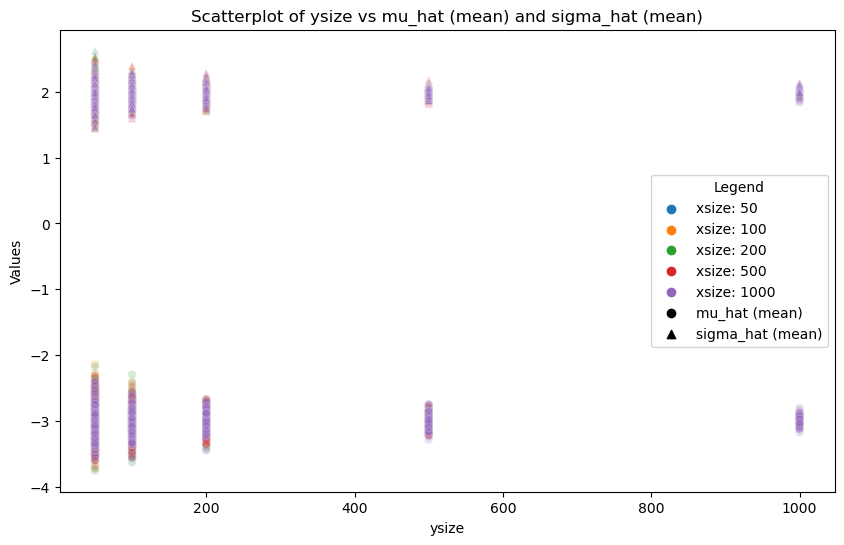

In [53]:
# Generate a color palette
palette = sns.color_palette(n_colors=len(hue.unique()))
hue_colors = {value: palette[i] for i, value in enumerate(hue.unique())}

# Initialize the plot
plt.figure(figsize=(10, 6))

# Create a scatterplot for mu_hat
sns.scatterplot(x=x, y=y_mu_hat, hue=hue, palette=hue_colors, marker='o', legend=False, alpha=0.2)

# Create a scatterplot for sigma_hat
sns.scatterplot(x=x, y=y_sigma_hat, hue=hue, palette=hue_colors, marker='^', legend=False, alpha=0.2)

# Add a combined legend
for hue_value, color in hue_colors.items():
    plt.scatter([], [], color=color, label=f'xsize: {hue_value}')

plt.scatter([], [], color='black', marker='o', label='mu_hat (mean)')
plt.scatter([], [], color='black', marker='^', label='sigma_hat (mean)')

# Customize the plot
plt.title('Scatterplot of ysize vs mu_hat (mean) and sigma_hat (mean)')
plt.xlabel('ysize')
plt.ylabel('Values')
plt.legend(title='Legend')
plt.show()

In [60]:
# go through the different simulation runs => 180
counter = 0
for mu, sigma, b in param_combinations:

	simulations_df = df_last_150_aggregated_index_reset[(df_last_150_aggregated_index_reset["mu"]==mu) 
						     & (df_last_150_aggregated_index_reset["sigma"]==sigma) 
						     & (df_last_150_aggregated_index_reset["b"]==b)]
	
	

	break

In [61]:
# Reset the multi-index and flatten the columns
simulations_df = simulations_df.reset_index()
simulations_df.columns = ['_'.join(filter(None, col)).strip() for col in simulations_df.columns.values]

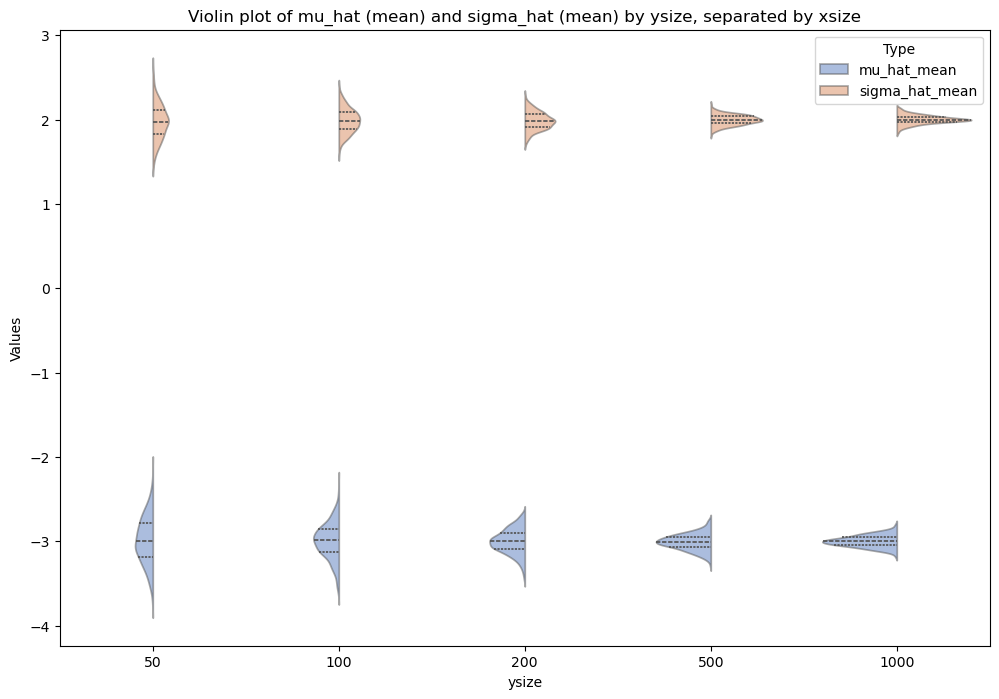

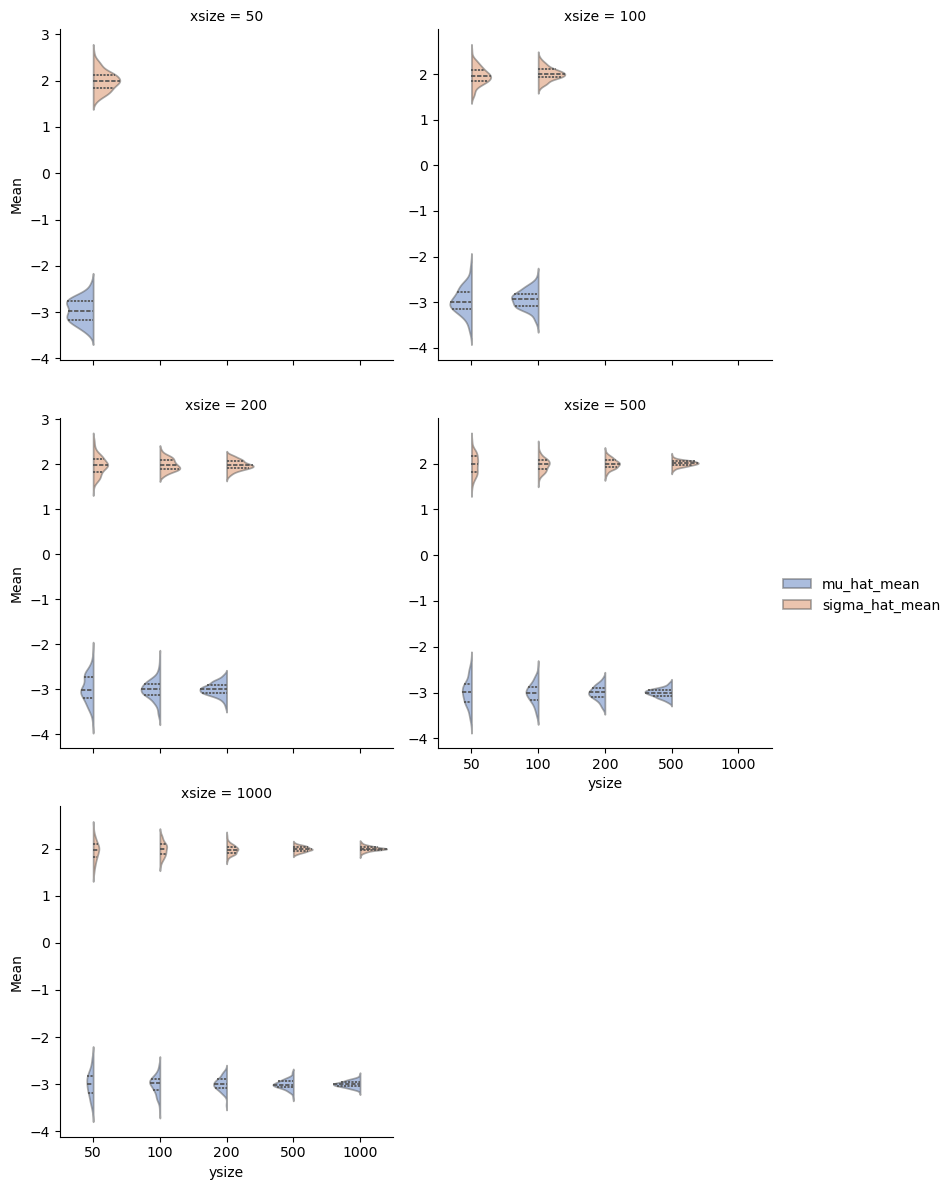

In [62]:

# Rename the columns for easier access
simulations_df.rename(columns={
    'ysize_': 'ysize',
    'xsize_': 'xsize',
    'mu_hat_mean': 'mu_hat_mean',
    'sigma_hat_mean': 'sigma_hat_mean'
}, inplace=True)

# Melt the DataFrame to long format for easier plotting with seaborn
df_long = pd.melt(simulations_df, id_vars=['ysize', 'xsize'], value_vars=['mu_hat_mean', 'sigma_hat_mean'], 
                  var_name='Type', value_name='Mean')

# Initialize the plot
plt.figure(figsize=(12, 8))

# Create a violin plot
sns.violinplot(x='ysize', y='Mean', hue='Type', data=df_long, split=True, inner='quartile', 
               palette='muted', alpha=0.5)

# Customize the plot
plt.title('Violin plot of mu_hat (mean) and sigma_hat (mean) by ysize, separated by xsize')
plt.xlabel('ysize')
plt.ylabel('Values')

# Separate the plots by xsize
g = sns.FacetGrid(df_long, col="xsize", col_wrap=2, sharey=False, height=6)
g.map_dataframe(sns.violinplot, x='ysize', y='Mean', hue='Type', split=True, inner='quartile', palette='muted', alpha=0.5)
g.add_legend()

plt.show()

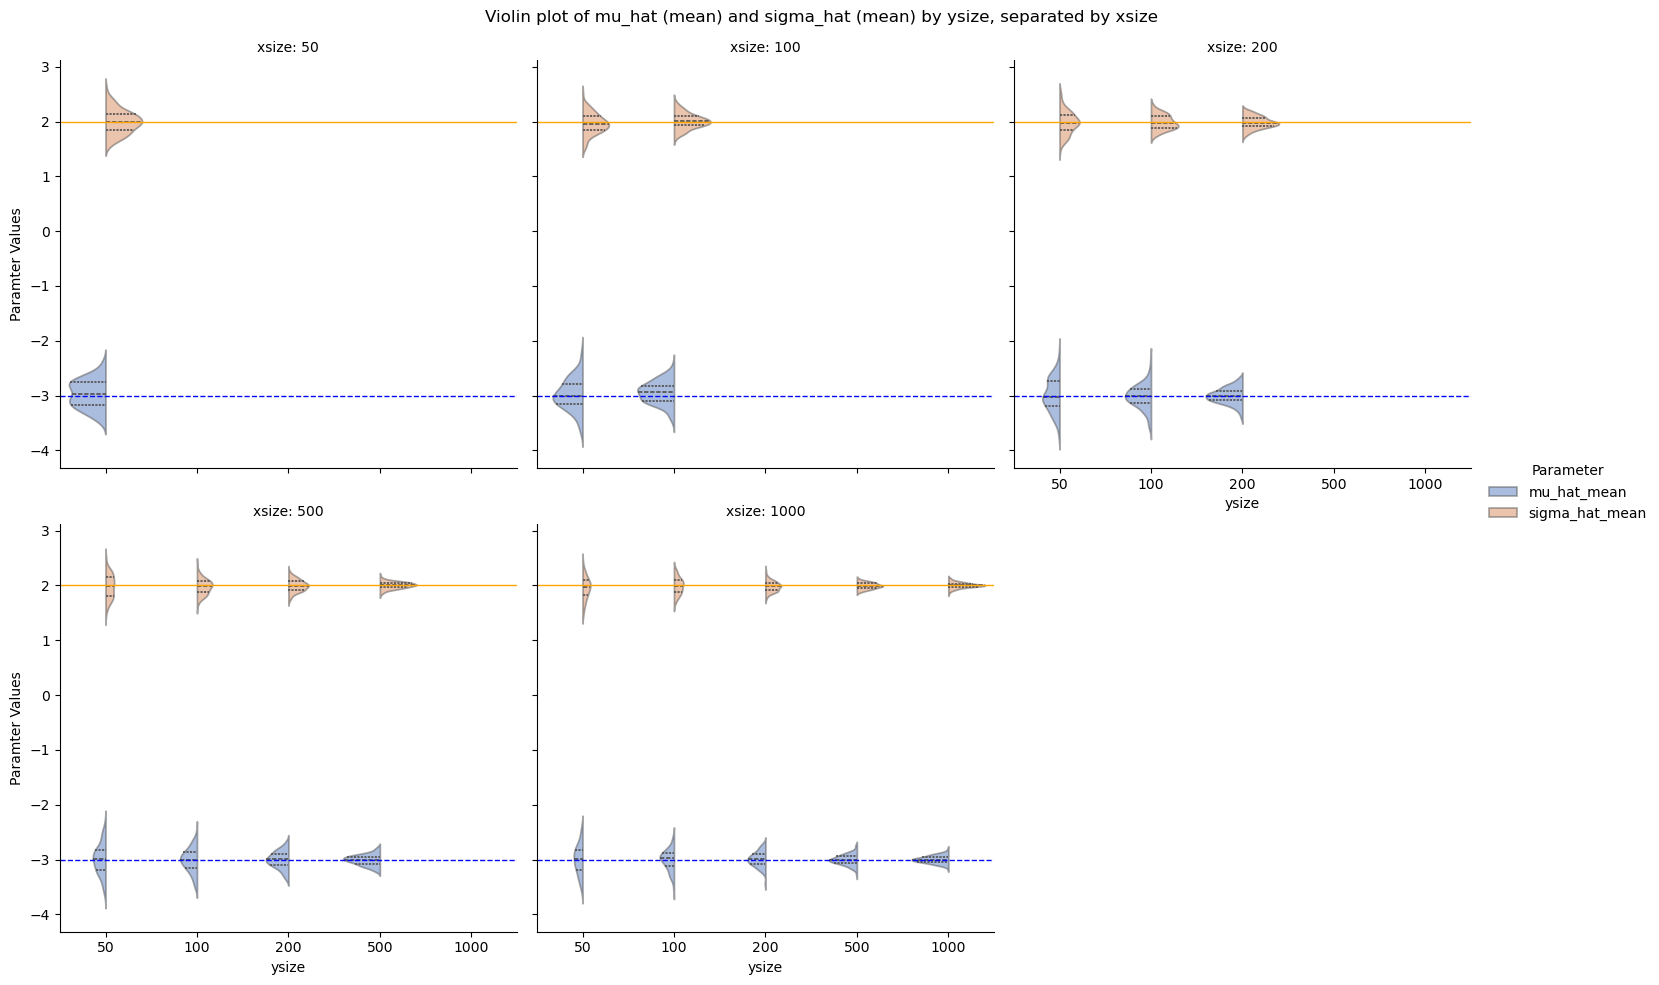

In [139]:
# Rename the columns for easier access
simulations_df.rename(columns={
    'ysize_': 'ysize',
    'xsize_': 'xsize',
    'mu_hat_mean': 'mu_hat_mean',
    'sigma_hat_mean': 'sigma_hat_mean'
}, inplace=True)

# Melt the DataFrame to long format for easier plotting with seaborn
df_long = pd.melt(simulations_df, id_vars=['ysize', 'xsize'], value_vars=['mu_hat_mean', 'sigma_hat_mean'], 
                  var_name='Type', value_name='Mean')

# Create a FacetGrid for separate violin plots by xsize
g = sns.FacetGrid(df_long, col="xsize", col_wrap=3, sharey=True, height=5, aspect=1)

# Map the violinplot to the FacetGrid
g.map_dataframe(sns.violinplot, x='ysize', y='Mean', hue='Type', split=True, inner='quartile', palette='muted', alpha=0.5)


# Add horizontal lines to each subplot
for ax in g.axes.flat:
    ax.axhline(y=simulations_df["mu"].iloc[0], color='blue', linestyle='--', linewidth=1)
    ax.axhline(y=simulations_df["sigma"].iloc[0], color='orange', linestyle='-', linewidth=1)

# Update legend labels
handles, labels = g.axes.flat[0].get_legend_handles_labels()
# Map to LaTeX format
labels = [r'$\mu_{\hat{\text{hat}}}$' if label == 'mu_hat' else r'$\sigma_{\hat{\text{hat}}}$' for label in labels]
# Add legends
g.add_legend(title='Parameter')




# Set titles and axis labels
g.set_axis_labels('ysize', 'Paramter Values')
g.set_titles(col_template='xsize: {col_name}')


# Adjust the main title
plt.subplots_adjust(top=0.93)
g.fig.suptitle('Violin plot of mu_hat (mean) and sigma_hat (mean) by ysize, separated by xsize')

plt.show()

In [128]:
simulations_df["mu"].iloc[0]

-3

c:\Users\nickk\anaconda3\envs\mt\Lib\site-packages\seaborn\axisgrid.py:186: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


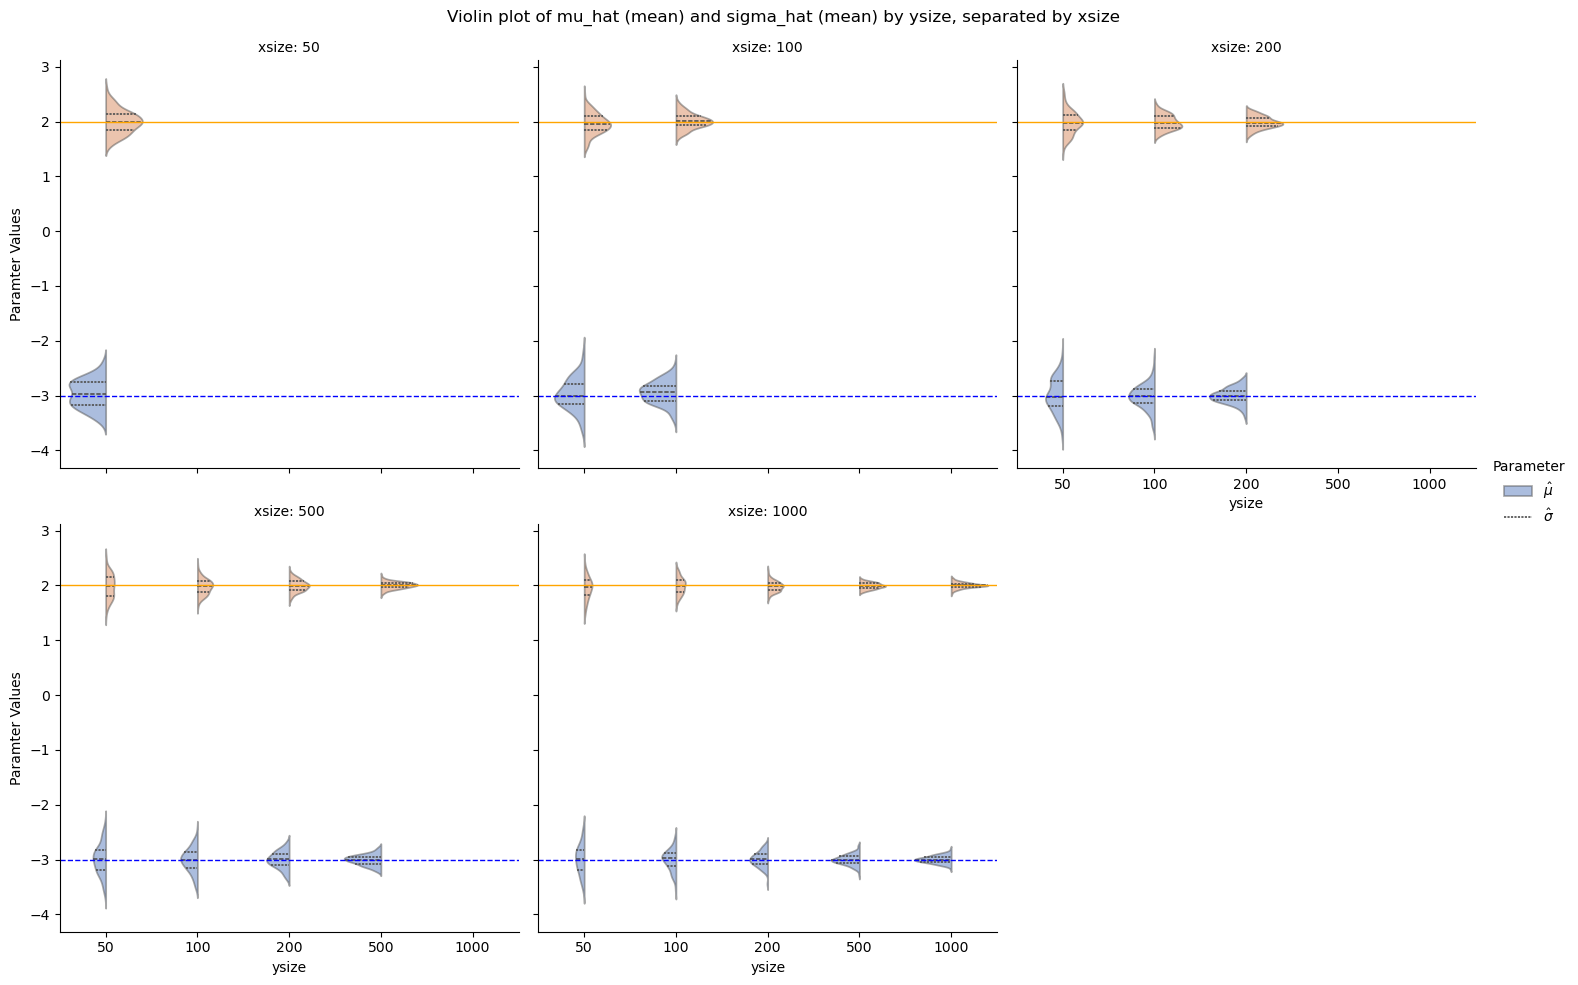

In [148]:
# Rename the columns for easier access
simulations_df.rename(columns={
    'ysize_': 'ysize',
    'xsize_': 'xsize',
    'mu_hat_mean': 'mu_hat_mean',
    'sigma_hat_mean': 'sigma_hat_mean'
}, inplace=True)

# Melt the DataFrame to long format for easier plotting with seaborn
df_long = pd.melt(simulations_df, id_vars=['ysize', 'xsize'], value_vars=['mu_hat_mean', 'sigma_hat_mean'], 
                  var_name='Type', value_name='Mean')

# Create a FacetGrid for separate violin plots by xsize
g = sns.FacetGrid(df_long, col="xsize", col_wrap=3, sharey=True, height=5, aspect=1)

# Map the violinplot to the FacetGrid
g.map_dataframe(sns.violinplot, x='ysize', y='Mean', hue='Type', split=True, inner='quartile', palette='muted', alpha=0.5)


# Add horizontal lines to each subplot
for ax in g.axes.flat:
    ax.axhline(y=simulations_df["mu"].iloc[0], color='blue', linestyle='--', linewidth=1)
    ax.axhline(y=simulations_df["sigma"].iloc[0], color='orange', linestyle='-', linewidth=1)

# Add legend manually with LaTeX labels
# Get handles and labels from one of the axes
handles, labels = g.axes.flat[0].get_legend_handles_labels()

# Replace old labels with LaTeX formatted ones
new_labels = [r'$\hat{\mu}$' if label == 'mu_hat_mean' else r'$\hat{\sigma}$' for label in labels]

# Remove existing legends (if any)
for ax in g.axes.flat:
    if ax.get_legend() is not None:
        ax.get_legend().remove()

# Add new legend with LaTeX formatted labels
g.add_legend(title='Parameter', labels=new_labels)



# Set titles and axis labels
g.set_axis_labels('ysize', 'Paramter Values')
g.set_titles(col_template='xsize: {col_name}')


# Adjust the main title
plt.subplots_adjust(top=0.93)
g.fig.suptitle('Violin plot of mu_hat (mean) and sigma_hat (mean) by ysize, separated by xsize')

plt.show()

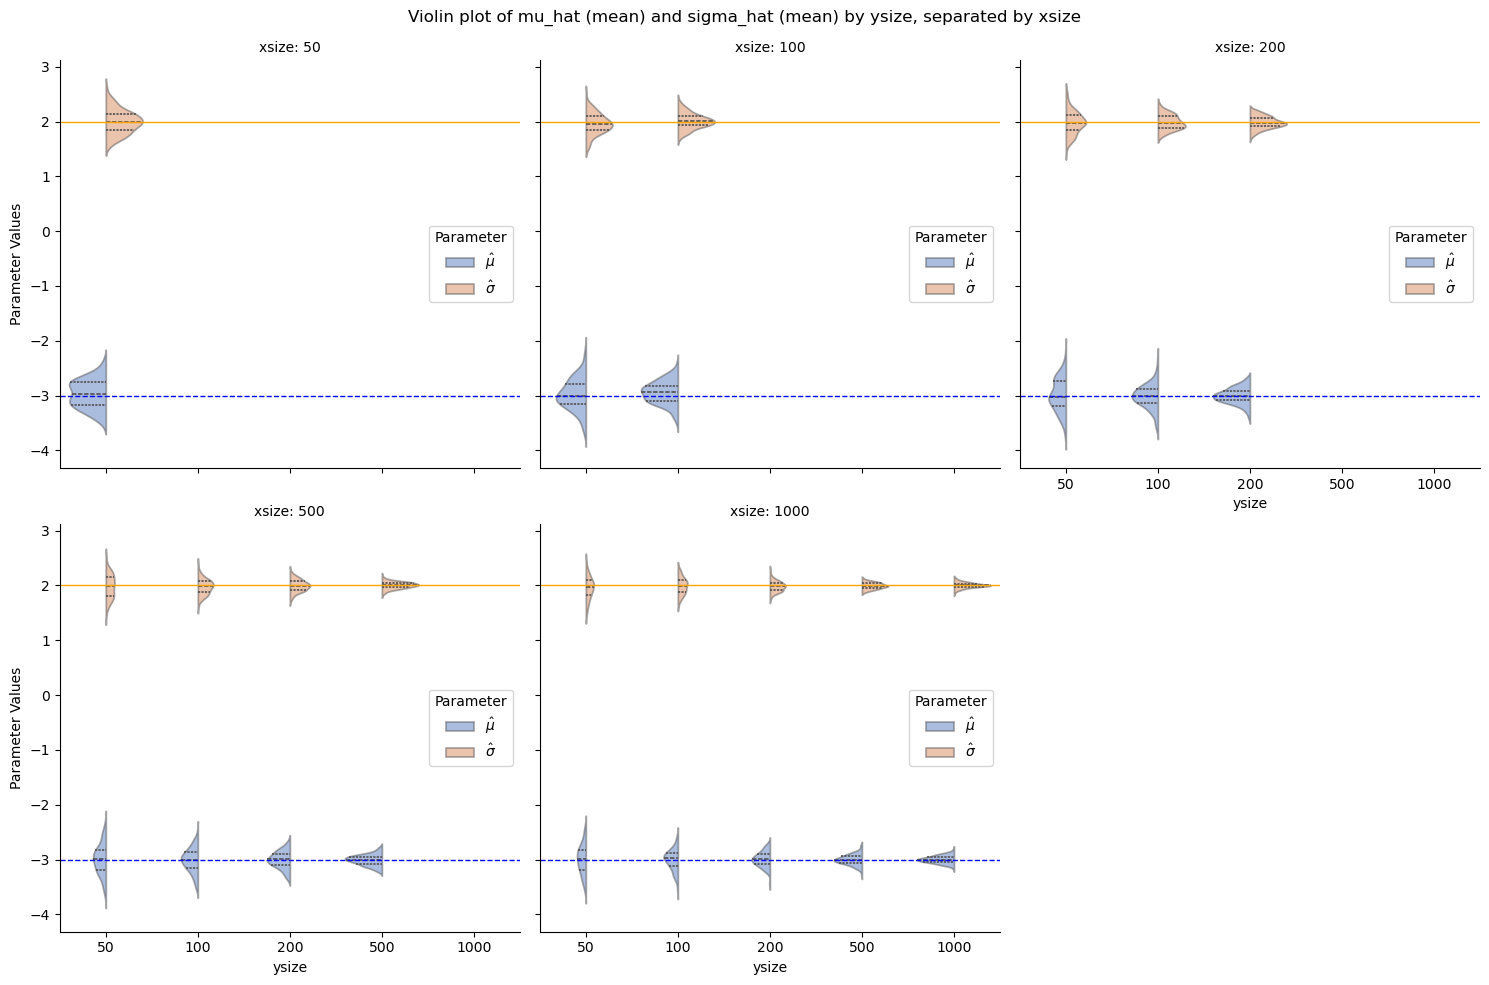

In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame setup (assuming similar structure)
# Replace this with your actual DataFrame
# simulations_df = pd.DataFrame(...)

# Rename the columns for easier access
simulations_df.rename(columns={
    'ysize_': 'ysize',
    'xsize_': 'xsize',
    'mu_hat_mean': 'mu_hat_mean',
    'sigma_hat_mean': 'sigma_hat_mean'
}, inplace=True)

# Melt the DataFrame to long format for easier plotting with seaborn
df_long = pd.melt(simulations_df, id_vars=['ysize', 'xsize'], value_vars=['mu_hat_mean', 'sigma_hat_mean'], 
                  var_name='Type', value_name='Mean')

# Create a FacetGrid for separate violin plots by xsize
g = sns.FacetGrid(df_long, col="xsize", col_wrap=3, sharey=True, height=5, aspect=1)

# Map the violinplot to the FacetGrid
g.map_dataframe(sns.violinplot, x='ysize', y='Mean', hue='Type', split=True, inner='quartile', palette='muted', alpha=0.5)

# Add horizontal lines to each subplot
for ax in g.axes.flat:
    ax.axhline(y=simulations_df["mu"].iloc[0], color='blue', linestyle='--', linewidth=1)
    ax.axhline(y=simulations_df["sigma"].iloc[0], color='orange', linestyle='-', linewidth=1)

# Get handles and labels from the first axis
handles, labels = g.axes.flat[0].get_legend_handles_labels()

# Replace old labels with LaTeX formatted ones
new_labels = [r'$\hat{\mu}$' if label == 'mu_hat_mean' else r'$\hat{\sigma}$' for label in labels]

# Manually add the new legend
# Create a new legend with the handles and updated labels
for ax in g.axes.flat:
    ax.legend(handles=handles, labels=new_labels, title='Parameter')

# Set titles and axis labels
g.set_axis_labels('ysize', 'Parameter Values')
g.set_titles(col_template='xsize: {col_name}')

# Adjust the main title
plt.subplots_adjust(top=0.93)
g.fig.suptitle('Violin plot of mu_hat (mean) and sigma_hat (mean) by ysize, separated by xsize')

plt.show()
